<a href="https://colab.research.google.com/github/muhammadefan/just_do_it/blob/main/Classification%3A%20Car%20Insurance%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Car Insurance Prediction**
by Muhammad Efan Abdulfattah

this work was coming from one of DPhi's Bootcamp: Final Project

### 1. Data Preparation

#### 1.1 Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
# define the path to which directory where the file is stored
path='/content/drive/MyDrive/learning py/dphi/ds bootcamp/'

os.listdir(path)

['Untitled0.ipynb',
 'Test_data.csv',
 'Train_data.csv',
 'dphi Final Assignment.ipynb']

In [ ]:
# load data train
df = pd.read_csv(path+'Train_data.csv')
df.shape

(3102, 18)

In [ ]:
# load data test
df_test = pd.read_csv(path+'Test_data.csv')
df_test.shape

(935, 17)

#### 1.2 Data Understanding

```
age                  : age of the customer
job_type             : what job does customer do (categorical)
marital_status       : if the customer is married or not (categorical)
education_level      : education level of the customer (categorical)
default_or_not       : if the customer was able to repay in time or not (0/1)
balance_amt          : balance amount of the customer in the bank
hoursehold_insurance : if the customer has bought household insurance or not (0/1)
car_loan             : if the customer has car loan (0/1)
communication        : mode of communication (categorical)
last_contact_day     : when the customer was last contacted (day)
last_contact_month   : when the customer was last contacted (month)
no_of_contacts       : How many times was the customer contacted
days_passed          : days passed since the last contact
prev_attempts        : how many times was the customer previously contacted 
outcome              : what was the outcome of the last contact
call_start           : call start time
call_end             : call end time
car_insurance        : if the customer bought car insurance (the target variable)
```

#### 1.3 Data Cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

from the data above, we get information that:
1. there are missing values
2. 'call_start' and 'call_end' features are object, not datetime, from this we can get duration of calling
3. 'age' is float, we need to change it into int

##### Duplicated Data Checking

In [ ]:
# duplicated data checking
df.duplicated(keep='first').sum()

300

In [ ]:
# duplicated data validation
dup = df[df.duplicated(keep=False)]
dup.sort_values(['age'], ascending=True).head(6)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
2903,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,NaN,13:30:30,13:34:57,1
2166,18.0,student,single,primary,0,608.0,0,0,cellular,12,aug,1,-1,0,NaN,13:30:30,13:34:57,1
1019,22.0,student,single,secondary,0,330.0,1,0,cellular,18,may,1,-1,0,NaN,12:41:31,12:43:16,0
2905,22.0,student,single,secondary,0,330.0,1,0,cellular,18,may,1,-1,0,NaN,12:41:31,12:43:16,0
1489,23.0,student,single,secondary,0,1809.0,0,0,cellular,8,jul,2,-1,0,NaN,09:07:17,09:14:11,1
3089,23.0,student,single,secondary,0,1809.0,0,0,cellular,8,jul,2,-1,0,NaN,09:07:17,09:14:11,1


In [ ]:
# drop duplicated data
df.drop_duplicates(inplace=True)

# re-checking on duplicated data
df.duplicated(keep='first').sum()

0

##### Missing Value Checking

In [ ]:
df.shape

(2802, 18)

In [ ]:
# missing value checking on data train
df.isna().sum()

age                       0
job_type                 10
marital_status            0
education_level          98
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           497
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2122
call_start                0
call_end                  0
car_insurance             0
dtype: int64

In [ ]:
# missing value checking on data test
df_test.isna().sum()

age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          165
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                695
call_start               0
call_end                 0
dtype: int64

```
the way to handle missing value in data test is the same as data train
```

In [ ]:
for idx,value in zip(df.isna().sum().index, df.isna().sum().values):
  if value != 0:
    print('{} >>> {:.2f}%'.format(idx,((value/df.shape[0])*100)))
  else:
    pass

job_type >>> 0.36%
education_level >>> 3.50%
communication >>> 17.74%
Outcome >>> 75.73%


###### **MV Handling: 'Outcome'**

In [ ]:
# uniqueness checking of 'Outcome'
df.Outcome.unique()

array([nan, 'other', 'failure', 'success'], dtype=object)

In [ ]:
# feature inspection
df[df.prev_attempts == 0]

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
5,37.000000,management,married,tertiary,0,3737.000000,0,0,cellular,7,jul,1,-1,0,NaN,10:15:03,10:18:47,1
6,30.000000,blue-collar,married,secondary,0,1.000000,0,1,cellular,9,jul,1,-1,0,NaN,10:51:56,10:57:43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,67.000000,retired,divorced,tertiary,0,443.000000,0,0,cellular,18,aug,1,-1,0,NaN,17:53:13,18:00:34,1
2797,41.073939,management,married,secondary,0,2753.566864,1,0,cellular,19,apr,1,-1,0,NaN,17:24:03,09:35:38,1
2798,30.000000,blue-collar,single,secondary,0,315.000000,0,0,cellular,23,jun,1,-1,0,NaN,09:37:38,10:01:05,1
2799,32.000000,blue-collar,married,primary,0,3136.000000,1,0,cellular,19,nov,1,-1,0,NaN,10:03:09,10:16:49,1


In [ ]:
# fill missing value with 'other'
df.Outcome.fillna('other', inplace=True)
df_test.Outcome.fillna('other', inplace=True)

# missing value re-checking
print(df.isna().sum(),'\n\n',df_test.isna().sum())

age                      0
job_type                10
marital_status           0
education_level         98
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          497
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                  0
call_start               0
call_end                 0
car_insurance            0
dtype: int64 

 age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          165
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                  0
call_start               0
call_end                 0
dtype: int64


###### **MV Handling: communication**

In [ ]:
# drop feature: 'communication'
df.drop('communication', axis=1, inplace=True)
df_test.drop('communication', axis=1, inplace=True)

###### **MV Handling: 'education_level'**
```
**still in consideration
```

In [ ]:
# take only not na value
# df = df[df.education_level.notna()]


# consideration: age, job_type
df.education_level.unique()

# plt.figure(figsize=(13,4))
# sns.countplot(x='job_type', hue='education_level', data=df)
# plt.tight_layout()
# plt.show()

array(['primary', 'tertiary', nan, 'secondary'], dtype=object)

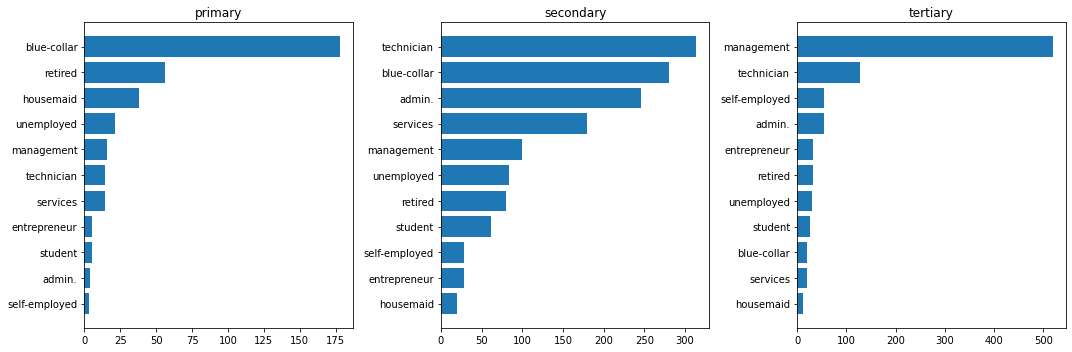

In [ ]:
## EDUCATION LEVEL vs. JOB TYPE
# find category of education level
edu = list(df.education_level.unique())
# remove nan value
edu.remove(np.NaN)
# sort it
edu.sort()

# data viz
fig, axes = plt.subplots(figsize=(15,5), nrows=1, ncols=3) 

for i,category in enumerate(edu):
  data = df[df.education_level == category]['job_type'].value_counts().sort_values(ascending=True)

  cat = data.index
  val = data.values

  axes[i].barh(y=cat, width=val)
  axes[i].set_title(category)
  
plt.tight_layout()
plt.show()

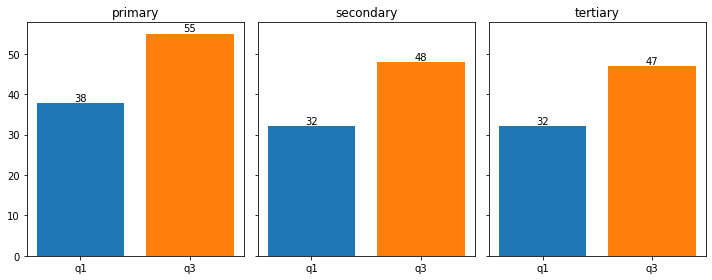

In [ ]:
## EDUCATION LEVEL vs. AGE
# data viz
fig, axes = plt.subplots(figsize=(10,4), nrows=1, ncols=3, sharey=True) 

for i,category in enumerate(edu):
  q1 = df[df.education_level == category]['age'].quantile(0.25)
  q3 = df[df.education_level == category]['age'].quantile(0.75)

  axes[i].bar(x='q1', height=q1)
  axes[i].bar(x='q3', height=q3)
  axes[i].set_title(category)

  # add annotation
  for p in axes[i].patches:
    axes[i].annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()), # (x,y)
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 5), 
                     textcoords = 'offset points') 
  

plt.tight_layout()
plt.show()

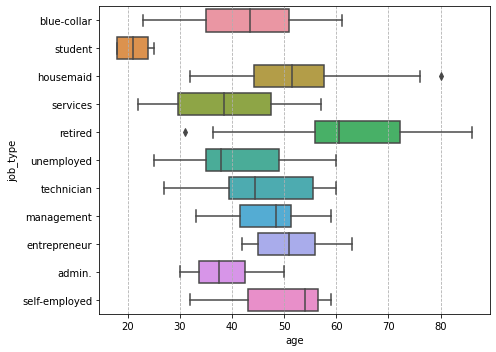

In [ ]:
# kalo kerjanya ini, umurnya sekian, background pendidikannya apa?

plt.figure(figsize=(7,5))
plt.grid(axis='x', linestyle='--')

sns.boxplot(y=df[df.education_level == 'primary'].job_type, x=df.age)

plt.tight_layout()
plt.show()

In [ ]:
df.groupby(['education_level','job_type']).age.quantile(0.25) #.index[0][1] #.values[0]

education_level  job_type     
primary          admin.           33.750000
                 blue-collar      35.000000
                 entrepreneur     45.000000
                 housemaid        44.287024
                 management       41.500000
                 retired          56.000000
                 self-employed    43.000000
                 services         29.750000
                 student          18.000000
                 technician       39.404622
                 unemployed       35.000000
secondary        admin.           32.000000
                 blue-collar      31.000000
                 entrepreneur     33.000000
                 housemaid        40.826988
                 management       33.946297
                 retired          56.238771
                 self-employed    35.000000
                 services         32.000000
                 student          23.000000
                 technician       33.000000
                 unemployed       35.000000
t

<BarContainer object of 11 artists>

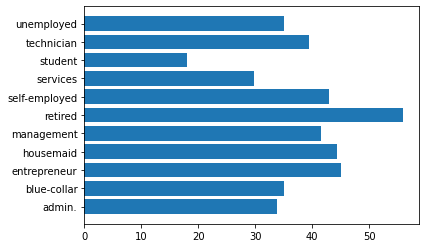

In [ ]:
values = df.groupby([df['education_level'] == 'primary','job_type']).age.quantile(0.25).values[11:] #.index[0][1] #.values[0]
jobs = df.job_type.unique()[:-1].tolist()

jobs.sort()

plt.figure(figsize=(6,4))
plt.barh(y=jobs, width=values)

In [ ]:
# ## FOR VALUE IMPUTATION
# # finding q1 & q3 from the data
# values = df.groupby([df['education_level'] == 'tertiary','job_type']).age.quantile(0.75).values[11:]
# jobs = df.job_type.unique()[:-1].tolist()

# # sort the job_type
# jobs.sort()

# # data imputation
# primary = ['blue-collar','retired','housemaid']
# secondary = ['technician','blue-collar','admin.']
# tertiary = ['management','technician','self-employed']

# # store data into dictionary
# dic={}
# for val,job in zip(values,jobs):
#   dic.update({job:int(val)})

# # print value
# for i in primary:
#   print(dic[i])

###### **MV Handling: 'job_type'**
```
**still in consideration
```

In [ ]:
df.job_type.unique()

array(['blue-collar', 'management', 'services', 'technician', 'admin.',
       'student', 'retired', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', nan], dtype=object)

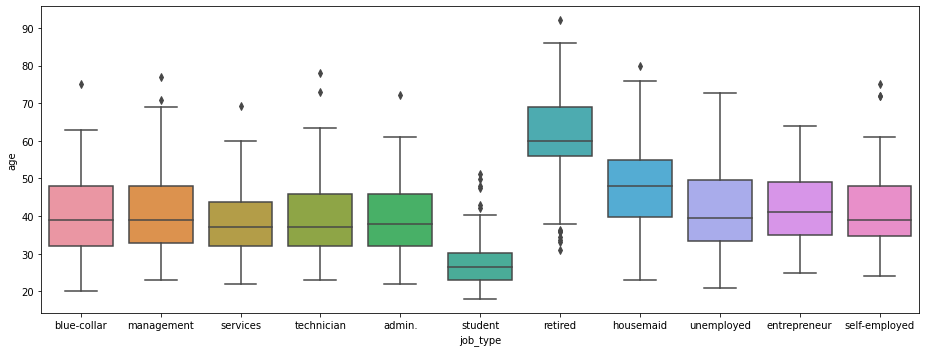

In [ ]:
# sns.countplot(df.job_type)
plt.figure(figsize=(13,5))
sns.boxplot(x=df.job_type, y=df.age)

plt.tight_layout()
plt.show()

In [ ]:
# # drop every row whose missing value in feature: 'job_type'
# df.dropna(subset=['job_type'], inplace=True)

# # missing value re-checking
# print(df.isna().sum())

##### Oulier Checking

In [ ]:
df.columns

Index(['age', 'job_type', 'marital_status', 'education_level',
       'default_or_not', 'balance_amt', 'household_insurance', 'car_loan',
       'last_contact_day', 'last_contact_month', 'no_of_contacts',
       'days_passed', 'prev_attempts', 'Outcome', 'call_start', 'call_end',
       'car_insurance'],
      dtype='object')

In [ ]:
df.describe()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance
count,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000,2802.000000
mean,41.262171,0.014276,1563.362505,0.467166,0.116702,15.391506,2.342612,51.825125,0.800143,0.571021
std,11.514053,0.118645,3269.785655,0.499010,0.321123,8.155126,2.570053,107.091362,2.276189,0.495019
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,126.020190,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,597.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000
75%,49.000000,0.000000,1732.783564,1.000000,0.000000,21.000000,3.000000,63.750000,1.000000,1.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


```
value = 0 or 1
- default_or_not
- household_insurance
- car_loan
- car_insurance (TARGET)
```

In [ ]:
# select only numerical-datatype features
df_nums = df.select_dtypes([int,float])
print(df_nums.shape)

(2802, 10)


In [ ]:
# de-select features whose value [0, 1]
cols=[]
for col in df_nums.columns:
  if list(df_nums[col].value_counts().index) != [0,1]:
    cols.append(col)

# delete the last one
cols.pop()

'car_insurance'

In [ ]:
# df preview
df_nums_ = df_nums[cols]
df_nums_.columns

Index(['age', 'balance_amt', 'last_contact_day', 'no_of_contacts',
       'days_passed', 'prev_attempts'],
      dtype='object')

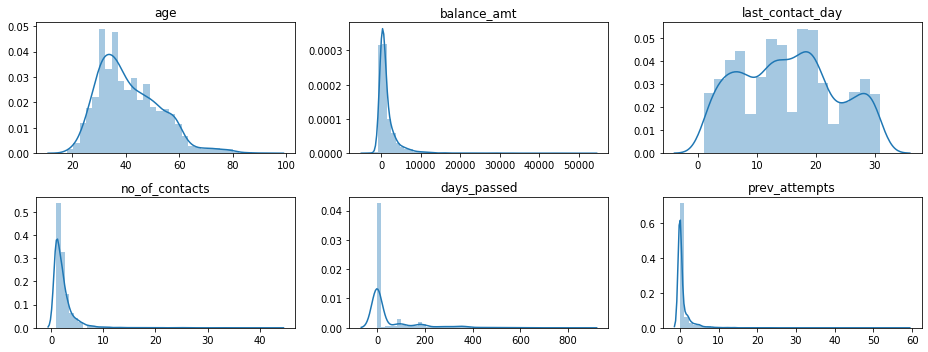

In [ ]:
# show distribution plot on nominal data
NROWS = 2
NCOLS = 3

fig, axes = plt.subplots(figsize=(13,5), nrows=NROWS, ncols=NCOLS)
feature_index = 0

try:
  for i in range(NROWS):
    for j in range(NCOLS):
      ax = sns.distplot(df_nums_.iloc[:, feature_index], ax=axes[i,j])
      ax.set(title=df_nums_.columns.values[feature_index], xlabel='',ylabel='')     
      feature_index += 1
except:
  pass

plt.tight_layout()
plt.show()

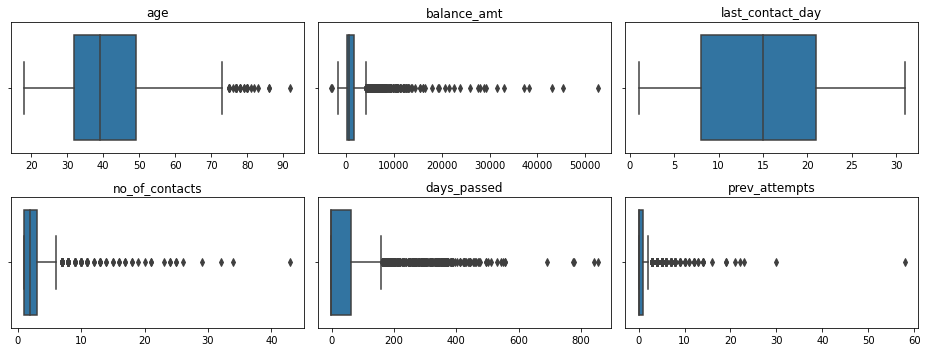

In [ ]:
# show distribution plot on nominal data
NROWS = 2
NCOLS = 3

fig, axes = plt.subplots(figsize=(13,5), nrows=NROWS, ncols=NCOLS)
feature_index = 0

try:
  for i in range(NROWS):
    for j in range(NCOLS):
      ax = sns.boxplot(df_nums_.iloc[:, feature_index], ax=axes[i,j])
      ax.set(title=df_nums_.columns.values[feature_index], xlabel='',ylabel='')     
      feature_index += 1
except:
  pass

plt.tight_layout()
plt.show()

###### **Feature: 'balance_amt'**

In [ ]:
# init IQR
bal_q1 = df.balance_amt.quantile(0.25)
bal_q3 = df.balance_amt.quantile(0.75)
bal_iqr = bal_q3 - bal_q1

# data selection
df_bal = df[~((df.balance_amt < (bal_q1 - (1.5*bal_iqr))) | (df.balance_amt > (bal_q3 + (1.5*bal_iqr))))]

# print shape of data
print(f'previous data shape: {df.shape}, current data shape:{df_bal.shape}')

previous data shape: (2802, 17), current data shape:(2532, 17)


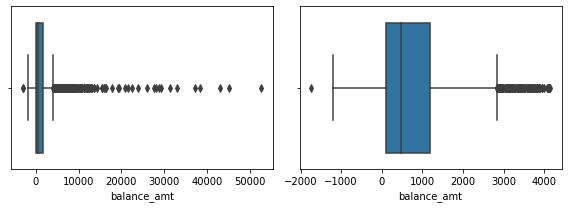

In [ ]:
# data distribution checking
fig, axes = plt.subplots(figsize=(8,3), nrows=1, ncols=2)

ax = sns.boxplot(df.balance_amt, ax=axes[0])
ax2 = sns.boxplot(df_bal.balance_amt, ax=axes[1])

plt.tight_layout()
plt.show()

###### **Feature: 'no_of_contacs'**

In [ ]:
# init IQR
no_q1 = df_bal.no_of_contacts.quantile(0.25)
no_q3 = df_bal.no_of_contacts.quantile(0.75)
no_iqr = no_q3 - no_q1

# data selection
df_no = df_bal[~((df_bal.no_of_contacts < (no_q1 - (1.5*no_iqr))) | (df_bal.no_of_contacts > (no_q3 + (1.5*no_iqr))))]

# print shape of data
print(f'previous data shape: {df_bal.shape}, current data shape:{df_no.shape}')

previous data shape: (2532, 17), current data shape:(2433, 17)


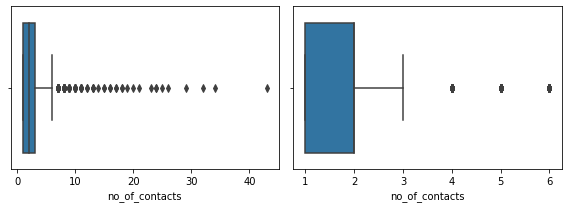

In [ ]:
# data distribution checking
fig, axes = plt.subplots(figsize=(8,3), nrows=1, ncols=2)

ax = sns.boxplot(df_bal.no_of_contacts, ax=axes[0])
ax2 = sns.boxplot(df_no.no_of_contacts, ax=axes[1])

plt.tight_layout()
plt.show()

###### **Feature: 'prev_attempts'**

In [ ]:
# df_no.prev_attempts.value_counts()
# df_no.prev_attempts.median()


In [ ]:
# data selection
df_pre = df_no[~(df_no.prev_attempts > df_no.prev_attempts.quantile(0.99))]

# print shape of data
print(f'previous data shape: {df_no.shape}, current data shape:{df_pre.shape}')

previous data shape: (2433, 17), current data shape:(2410, 17)


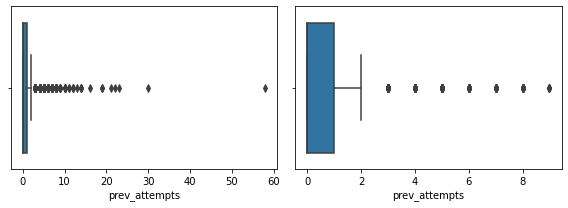

In [ ]:
# data distribution checking
fig, axes = plt.subplots(figsize=(8,3), nrows=1, ncols=2)

ax = sns.boxplot(df_no.prev_attempts, ax=axes[0])
ax2 = sns.boxplot(df_pre.prev_attempts, ax=axes[1])

plt.tight_layout()
plt.show()

###### **Feature: 'days_passed'**

In [ ]:
df_cleaned = df_pre.copy()

In [ ]:
df_cleaned.isna().sum()

age                     0
job_type                9
marital_status          0
education_level        82
default_or_not          0
balance_amt             0
household_insurance     0
car_loan                0
last_contact_day        0
last_contact_month      0
no_of_contacts          0
days_passed             0
prev_attempts           0
Outcome                 0
call_start              0
call_end                0
car_insurance           0
dtype: int64

In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 16)

#### 1.4 Simple Exploratory Data Analysis 

In [ ]:
# data preview
df_cleaned.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,13,may,1,-1,0,other,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,16,may,1,-1,0,other,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,29,jan,1,-1,0,other,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,14,may,3,346,4,failure,12:12:30,12:27:14,1


##### **'pre_attemps' v.s 'days_passed'**

In [ ]:
# analyzing relationship between 'pre_attemps' & 'days_passed'
no_call = df_cleaned[['prev_attempts','days_passed']].sort_values('prev_attempts').head(30)

# data preview
print(no_call)

# from here we know that -1 in 'days_passed' means the costumer never get called

      prev_attempts  days_passed
0                 0           -1
1738              0           -1
1737              0           -1
1736              0           -1
1735              0           -1
1734              0           -1
1733              0           -1
1732              0           -1
1729              0           -1
1728              0           -1
1727              0           -1
1726              0           -1
1725              0           -1
1719              0           -1
1718              0           -1
1715              0           -1
1714              0           -1
1713              0           -1
1710              0           -1
1709              0           -1
1706              0           -1
1703              0           -1
1701              0           -1
1700              0           -1
1699              0           -1
1698              0           -1
1697              0           -1
1696              0           -1
1739              0           -1
1740      

### 2. Data Preprocessing

In [ ]:
df_cleaned.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,13,may,1,-1,0,other,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,16,may,1,-1,0,other,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,29,jan,1,-1,0,other,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,14,may,3,346,4,failure,12:12:30,12:27:14,1


#### 2.1 Datatype Checking

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2801
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2410 non-null   float64
 1   job_type             2401 non-null   object 
 2   marital_status       2410 non-null   object 
 3   education_level      2328 non-null   object 
 4   default_or_not       2410 non-null   int64  
 5   balance_amt          2410 non-null   float64
 6   household_insurance  2410 non-null   int64  
 7   car_loan             2410 non-null   int64  
 8   last_contact_day     2410 non-null   int64  
 9   last_contact_month   2410 non-null   object 
 10  no_of_contacts       2410 non-null   int64  
 11  days_passed          2410 non-null   int64  
 12  prev_attempts        2410 non-null   int64  
 13  Outcome              2410 non-null   object 
 14  call_start           2410 non-null   object 
 15  call_end             2410 non-null   o

```
as we can see above that:
1. 'age' is float, we need to change it into int
2. 'call_start' and 'call_end' features are object, not datetime
```

#### 2.2 Data Encoding

In [ ]:
df_cleaned.dtypes

age                    float64
job_type                object
marital_status          object
education_level         object
default_or_not           int64
balance_amt            float64
household_insurance      int64
car_loan                 int64
last_contact_day         int64
last_contact_month      object
no_of_contacts           int64
days_passed              int64
prev_attempts            int64
Outcome                 object
call_start              object
call_end                object
car_insurance            int64
dtype: object

##### One-Hot Encoding

In [ ]:
# before
df_cleaned.shape

(2410, 17)

In [ ]:
## TRAIN DATASET
# encode object datatype using on hot encoding, except: 'call_start', 'call_end' & 'last_contact_month'
job_typ = pd.get_dummies(df_cleaned.job_type, drop_first=True)
mar_sts = pd.get_dummies(df_cleaned.marital_status, drop_first=True)
edu_lvl = pd.get_dummies(df_cleaned.education_level, drop_first=True)
outcome = pd.get_dummies(df_cleaned.Outcome, drop_first=True)

# drop un-encoded features
df_cleaned.drop(['job_type','marital_status','education_level','Outcome'], axis=1, inplace=True)

# add the encoded features
df_cleaned = pd.concat([df_cleaned, job_typ, mar_sts, edu_lvl, outcome], axis=1)
df_cleaned.head(3)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success
0,47.000000,0,1112.000000,1,0,13,may,1,-1,0,10:22:20,10:24:29,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,46.031442,0,1.312372,0,1,15,may,3,219,1,09:06:30,13:59:48,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,36.000000,0,281.000000,1,0,16,may,1,-1,0,13:18:41,13:27:16,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
# after
df_cleaned.shape

(2410, 29)

In [ ]:
# before
df_test.shape

(935, 16)

In [ ]:
## TEST DATASET
# encode object datatype using one-hot encoding, except: 'call_start', 'call_end' & 'last_contact_month'
job_typ_test = pd.get_dummies(df_test.job_type, drop_first=True)
mar_sts_test = pd.get_dummies(df_test.marital_status, drop_first=True)
edu_lvl_test = pd.get_dummies(df_test.education_level, drop_first=True)
outcome_test = pd.get_dummies(df_test.Outcome, drop_first=True)

# drop un-encoded features
df_test.drop(['job_type','marital_status','education_level','Outcome'], axis=1, inplace=True)

# add the encoded features
df_test = pd.concat([df_test, job_typ_test, mar_sts_test, edu_lvl_test, outcome_test], axis=1)
df_test.head(3)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success
0,65.0,0,20806.0,0,0,8,apr,2,-1,0,12:22:13,12:30:56,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,36.0,0,900.0,1,0,15,may,2,-1,0,17:59:45,18:07:40,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,37.0,0,6771.0,0,0,7,sep,1,186,1,14:05:19,14:10:56,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
# after
df_test.shape

(935, 28)

##### Label Encoding

In [ ]:
# 'last_contact_month' mapping
lcm_mapping = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

# encoding process
df_cleaned.last_contact_month = df_cleaned.last_contact_month.map(lcm_mapping)

# datatype preview
df_cleaned.dtypes

age                    float64
default_or_not           int64
balance_amt            float64
household_insurance      int64
car_loan                 int64
last_contact_day         int64
last_contact_month       int64
no_of_contacts           int64
days_passed              int64
prev_attempts            int64
call_start              object
call_end                object
car_insurance            int64
blue-collar              uint8
entrepreneur             uint8
housemaid                uint8
management               uint8
retired                  uint8
self-employed            uint8
services                 uint8
student                  uint8
technician               uint8
unemployed               uint8
married                  uint8
single                   uint8
secondary                uint8
tertiary                 uint8
other                    uint8
success                  uint8
dtype: object

In [ ]:
# 'last_contact_month' mapping
lcm_mapping_test = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

# encoding process
df_test.last_contact_month = df_test.last_contact_month.map(lcm_mapping_test)

# datatype preview
df_test.dtypes

age                    float64
default_or_not           int64
balance_amt            float64
household_insurance      int64
car_loan                 int64
last_contact_day         int64
last_contact_month       int64
no_of_contacts           int64
days_passed              int64
prev_attempts            int64
call_start              object
call_end                object
blue-collar              uint8
entrepreneur             uint8
housemaid                uint8
management               uint8
retired                  uint8
self-employed            uint8
services                 uint8
student                  uint8
technician               uint8
unemployed               uint8
married                  uint8
single                   uint8
secondary                uint8
tertiary                 uint8
other                    uint8
success                  uint8
dtype: object

In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 28)

#### 2.3 Feature Selection

##### Feature Engineering: **Finding Call Duration**

###### TRAINING DATASET

In [ ]:
# time (in second) calculation for finding 'call_duration'
a = pd.to_datetime(df_cleaned.call_start, format='%H:%M:%S') - pd.to_datetime(df_cleaned.call_start, format='%H:%M:%S').dt.normalize()
b = pd.to_datetime(df_cleaned.call_end, format='%H:%M:%S') - pd.to_datetime(df_cleaned.call_end, format='%H:%M:%S').dt.normalize()
c = pd.concat([a,b], axis=1)

# enter the into main df
df_cleaned['call_duration'] = c.call_end - c.call_start
df_cleaned.head(3)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,car_insurance,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success,call_duration
0,47.000000,0,1112.000000,1,0,13,5,1,-1,0,10:22:20,10:24:29,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0 days 00:02:09
1,46.031442,0,1.312372,0,1,15,5,3,219,1,09:06:30,13:59:48,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0 days 04:53:18
2,36.000000,0,281.000000,1,0,16,5,1,-1,0,13:18:41,13:27:16,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0 days 00:08:35


In [ ]:
# data preview
print(df_cleaned.call_duration.dt.total_seconds())

# deep dive preview into data to see value in the index number 2797
print(f'\n------------------\nstart call [idx 2797]: {c.call_start[2797]}\nend call [idx 2797]: {c.call_end[2797]}')
# it's odd right? let's handle it!

0         129.0
1       17598.0
2         515.0
3         750.0
4         884.0
         ...   
2797   -28105.0
2798     1407.0
2799      820.0
2800       36.0
2801      131.0
Name: call_duration, Length: 2410, dtype: float64

------------------
start call [idx 2797]: 0 days 17:24:03
end call [idx 2797]: 0 days 09:35:38


In [ ]:
# # pick non-negative seconds
# df_cleaned = df_cleaned[~(df_cleaned.call_duration.dt.total_seconds() < 0)]

# # data preview
# print(df_cleaned.call_duration.dt.total_seconds())

# # datatype checking
# print(f'\n---------------\ndatatype of call_duration: {df_cleaned.call_duration.dtypes}')

In [ ]:
# datatype conversion
df_cleaned.call_duration = df_cleaned.call_duration.astype('int')

# datatype checking
print(f'datatype of call_duration: {df_cleaned.call_duration.dtypes}\n-------------\n')

# data preview
print(df_cleaned.call_duration.head(3))
# arghh!! let's take care of it!

datatype of call_duration: int64
-------------

0      129000000000
1    17598000000000
2      515000000000
Name: call_duration, dtype: int64


In [ ]:
# adjust the value
df_cleaned.call_duration = df_cleaned.call_duration/1000000000

# data preview
df_cleaned.call_duration.head(3)

# good to go!

0      129.0
1    17598.0
2      515.0
Name: call_duration, dtype: float64

###### TESTING DATASET

In [ ]:
# time (in second) calculation for finding 'call_duration'
a = pd.to_datetime(df_test.call_start, format='%H:%M:%S') - pd.to_datetime(df_test.call_start, format='%H:%M:%S').dt.normalize()
b = pd.to_datetime(df_test.call_end, format='%H:%M:%S') - pd.to_datetime(df_test.call_end, format='%H:%M:%S').dt.normalize()
c = pd.concat([a,b], axis=1)

# enter the into main df
df_test['call_duration'] = c.call_end - c.call_start
df_test.head(3)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,call_start,call_end,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success,call_duration
0,65.0,0,20806.0,0,0,8,4,2,-1,0,12:22:13,12:30:56,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0 days 00:08:43
1,36.0,0,900.0,1,0,15,5,2,-1,0,17:59:45,18:07:40,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0 days 00:07:55
2,37.0,0,6771.0,0,0,7,9,1,186,1,14:05:19,14:10:56,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0 days 00:05:37


In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 29)

In [ ]:
# data preview
print(df_test.call_duration.dt.total_seconds())

# deep dive preview into data to see value in the index number 3
print(f'\n------------------\nstart call [idx 2797]: {c.call_start[3]}\nend call [idx 2797]: {c.call_end[3]}')
# it's odd right? let's handle it!

0        523.0
1        475.0
2        337.0
3     -27933.0
4         65.0
        ...   
930      831.0
931      352.0
932      664.0
933      893.0
934      520.0
Name: call_duration, Length: 935, dtype: float64

------------------
start call [idx 2797]: 0 days 17:33:27
end call [idx 2797]: 0 days 09:47:54


In [ ]:
# # pick non-negative seconds
# df_test = df_test[~(df_test.call_duration.dt.total_seconds() < 0)]

# # data preview
# print(df_test.call_duration.dt.total_seconds())

# # datatype checking
# print(f'\n---------------\ndatatype of call_duration: {df_test.call_duration.dtypes}')

In [ ]:
# datatype conversion
df_test.call_duration = df_test.call_duration.astype('int')

# datatype checking
print(f'datatype of call_duration: {df_test.call_duration.dtypes}\n-------------\n')

# data preview
print(df_test.call_duration.head(3))
# arghh!! let's take care of it!

datatype of call_duration: int64
-------------

0    523000000000
1    475000000000
2    337000000000
Name: call_duration, dtype: int64


In [ ]:
# adjust the value
df_test.call_duration = df_test.call_duration/1000000000

# data preview
df_test.call_duration.head(3)

# good to go!

0    523.0
1    475.0
2    337.0
Name: call_duration, dtype: float64

In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 29)

##### Feature Engineering: **Drop Unnecessary Features**

###### TRAINING DATASET

In [ ]:
# since we have known about 'last_contact_day', it is fine if we drop 'last_contact_month'
# also we have gotten 'call_duration', so we can drop 'call_start' & 'call_end'
df_cleaned.drop(['call_start','call_end'], axis=1, inplace=True)

# reset index
df_cleaned.reset_index(drop=True, inplace=True)

# data preview
(df_cleaned.head(3))

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,car_insurance,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success,call_duration
0,47.000000,0,1112.000000,1,0,13,5,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,129.0
1,46.031442,0,1.312372,0,1,15,5,3,219,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,17598.0
2,36.000000,0,281.000000,1,0,16,5,1,-1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,515.0


###### TESTING DATASET

In [ ]:
# since we have known about 'last_contact_day', it is fine if we drop 'last_contact_month'
# also we have gotten 'call_duration', so we can drop 'call_start' & 'call_end'
df_test.drop(['call_start','call_end'], axis=1, inplace=True)

# reset index
df_test.reset_index(drop=True, inplace=True)

# data preview
df_test.head(3)

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,secondary,tertiary,other,success,call_duration
0,65.0,0,20806.0,0,0,8,4,2,-1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,523.0
1,36.0,0,900.0,1,0,15,5,2,-1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,475.0
2,37.0,0,6771.0,0,0,7,9,1,186,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,337.0


In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 27)

##### Features Correlation Checking

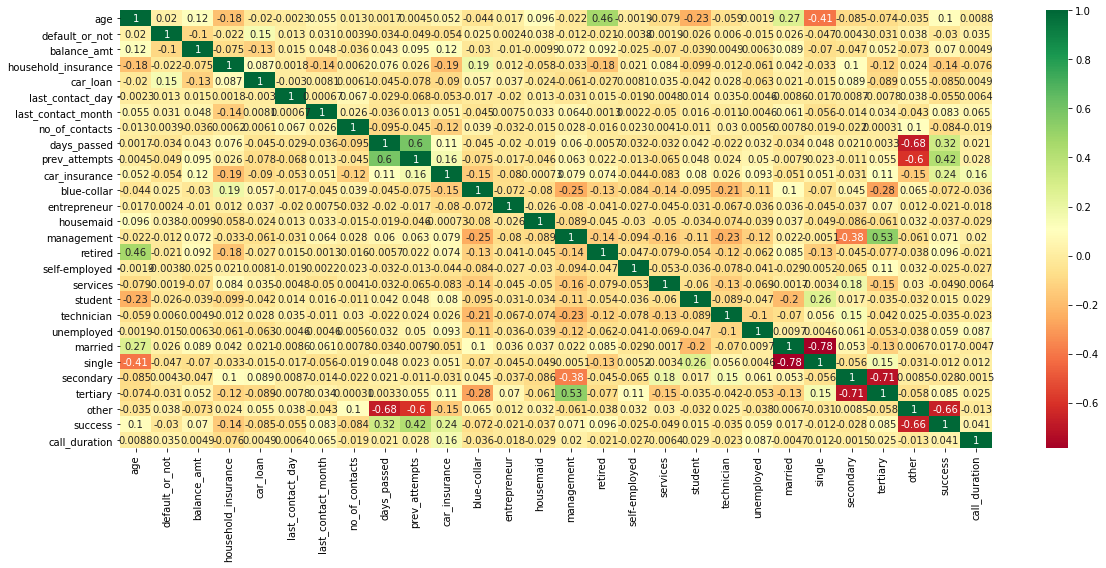

In [ ]:
plt.figure(figsize=(17,8))
sns.heatmap(df_cleaned.corr(),annot=True,cmap='RdYlGn')

plt.tight_layout()
plt.show()

#### 2.4 Data Proportion Checking

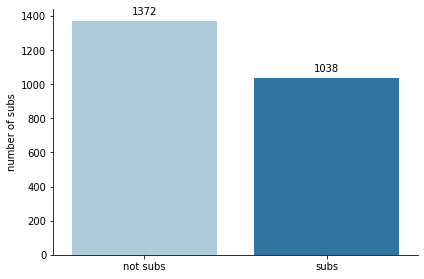

In [ ]:
s_series = df_cleaned.car_insurance.map({0:'not subs', 1:'subs'})

# create barplot, find more colors here: https://seaborn.pydata.org/tutorial/color_palettes.html
ax = sns.barplot(s_series.unique(), df_cleaned.car_insurance.value_counts(), palette='Paired')

# add annotation
for p in ax.patches:  
    ax.annotate(format(p.get_height(), '.0f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()), # (x, y)
                  ha = 'center',  
                  va = 'center',  
                  xytext = (0, 9),  
                  textcoords = 'offset points')  
    
# remove right and top spine
sns.despine(right=True, top=True)  

plt.ylabel('number of subs')
plt.tight_layout()
plt.show()

In [ ]:
no_subs = df_cleaned.car_insurance.value_counts()[1]/df_cleaned.shape[0]
subs = df_cleaned.car_insurance.value_counts()[0]/df_cleaned.shape[0]

print('percentage:\nsubs    = {:.2f}%\nno subs = {:.2f}%'.format(subs*100,no_subs*100))

percentage:
subs    = 43.07%
no subs = 56.93%


### 3. Data Modelling

#### 3.1 Training Phase

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [ ]:
# split the data for training and testing
X = df_cleaned.drop('car_insurance', axis=1) #df_scaled
y = df_cleaned.car_insurance #.astype('float')

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=4, shuffle=True) # best = 4

In [ ]:
# accuracy checking using Stratified K-Fold
model = XGBClassifier()

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy=[]
for train_idx, eval_idx in skf.split(X,y):
  X_train_fold, X_eval_fold = X.iloc[train_idx], X.iloc[eval_idx]
  y_train_fold, y_eval_fold = y.iloc[train_idx], y.iloc[eval_idx]

  model.fit(X_train_fold, y_train_fold)
  accuracy.append(model.score(X_eval_fold, y_eval_fold))

# print average accuracy
print(np.array(accuracy).mean())

0.8659751037344398


In [ ]:
acc={}
for num,i in enumerate(range(60)):
  X_train,X_eval,y_train,y_eval = train_test_split(X, y, test_size=0.33, random_state=i, shuffle=True)
  
  # model traininig
  model = XGBClassifier().fit(X_train,y_train)
  # model predicting
  y_pred = model.predict(X_eval)
  # model evaluating
  acc.update({num:accuracy_score(y_eval, y_pred)})

#acc

##### Hyperparams Tuning: XGBoost (it takes forever, so reconsider the values)

In [ ]:
# init hyperparams values
params={'max_depth': [x for x in range(3,11)],
        'gamma': [0,1,2,3],
        'reg_alpha' : [x for x in range(0,11)],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [x for x in range(1,11)],
        'n_estimators': [100,120,140,160]
       }

print(params)

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'gamma': [0, 1, 2, 3], 'reg_alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'reg_lambda': [0, 1], 'colsample_bytree': [0.5, 1], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [100, 120, 140, 160]}


In [ ]:
# model init
model = XGBClassifier()

# hyperparameters tuning
model_gs = GridSearchCV(estimator=model, param_grid=params)

# training phase
model_gs.fit(X_train, y_train)

##### Hyperparams Tuning: RandomForest

In [ ]:
# hyperparameters tuning: RandomForest
# parameters initiation
n_estimators = [int(x) for x in np.linspace(start=10,stop=300, num=10)]
max_features = ['auto','sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True,False]

# create variable for storing the features 
params = {'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
          'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

# params preview
print(params)

{'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
# model init
model = RandomForestClassifier()

# hyperparameters tuning
model_gs = GridSearchCV(estimator=model, param_grid=params)

# training phase
model_gs.fit(X_train, y_train)

In [ ]:
# check best parameters
model_gs.best_params_

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [ ]:
# evaluation phase
y_pred = model_gs.predict(X_eval)

# accuracy checking
accuracy_score(y_eval, y_pred)

0.8284923928077456

In [ ]:
confusion_matrix(y_eval, y_pred)

array([[266,  59],
       [ 65, 333]])

In [ ]:
# number of evaluated data
a=confusion_matrix(y_eval, y_pred)
b=[]

for i in range(0,2):
  for j in range(0,2):
    c = a[i][j]
    b.append(c)

sum(b)

482

##### *features importance for RandomForest*

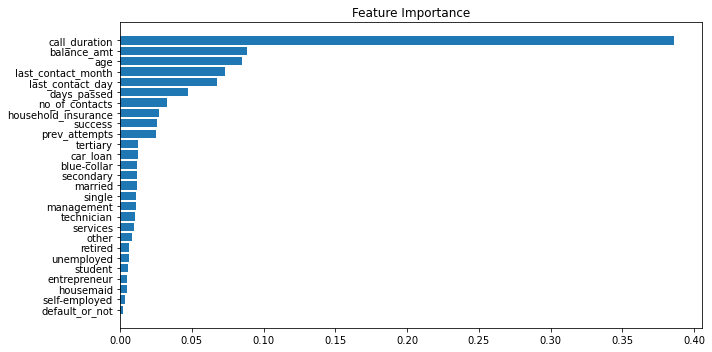

In [ ]:
# only for random forest model
## FEATURE IMPORTANCE ##
# model init
model = RandomForestClassifier()

# training phase
model.fit(X_train, y_train)

im = model.feature_importances_

im_df = pd.DataFrame(im, index=X.columns, columns=['feature_importance'])
im_df.sort_values('feature_importance', inplace=True)

# feature importance viz
plt.figure(figsize=(10,5))
plt.barh(im_df.index, im_df.feature_importance)

plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
# find selected features
selected_features = im_df[im_df.feature_importance > im_df.feature_importance.median()].index

# pick selected features
X_selected = X[selected_features]

# split training and evaluating data
X_train, X_eval, y_train, y_eval = train_test_split(X_selected, y, test_size=0.2, random_state=1, shuffle=True)

# train model again
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### **Straight to Training Phase!** (without hyperparams tuning)

In [ ]:
# model init
model = XGBClassifier()

# training phase
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#### 3.2 Evaluating Phase

In [ ]:
# evaluation phase
y_pred = model.predict(X_eval)

# accuracy checking
accuracy_score(y_eval, y_pred)

0.8734439834024896

In [ ]:
# classification report
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       325
           1       0.88      0.89      0.89       398

    accuracy                           0.87       723
   macro avg       0.87      0.87      0.87       723
weighted avg       0.87      0.87      0.87       723



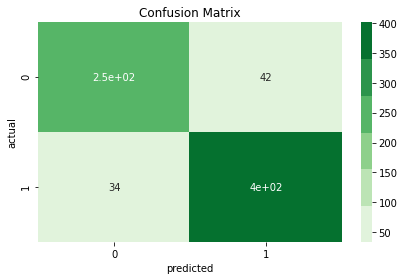

In [ ]:
# confusion matrix
mx = confusion_matrix(y_eval, y_pred)

cm = sns.color_palette('Greens')
sns.heatmap(mx, annot=True, cmap=cm)

plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.tight_layout()
plt.show()

In [ ]:
confusion_matrix(y_eval, y_pred)

array([[246,  42],
       [ 34, 401]])

#### 3.3 Testing Phase

In [ ]:
# monitoring on the data test shape
df_test.shape

(935, 27)

In [ ]:
# testing phase
test = model.predict(df_test)

# create df to store the result
result = pd.DataFrame({'prediction':test})

# save it into csv file
result.to_csv('prediction_results.csv', index=False)

# data preview
result.head(25)

,prediction
0,1
1,1
2,1
3,1
4,0
5,0
6,1
7,1
8,1
9,0


In [ ]:
# save it in local
from google.colab import files

files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>